# Time Series Analysis with Python

In this notebook, we will apply **time series analysis** step by step using Python.  
We will use the famous **AirPassengers dataset** (monthly airline passengers from 1949 to 1960).

**Workflow**
1. Load & visualize data  
2. Decompose time series (trend, seasonality, residuals)  
3. Check stationarity (ADF test)  
4. Make series stationary (differencing)  
5. Build ARIMA model  
6. Forecast future values  
7. Evaluate the model  


## Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

## Load the Data

We will use the **AirPassengers dataset** (monthly data from 1949–1960).

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


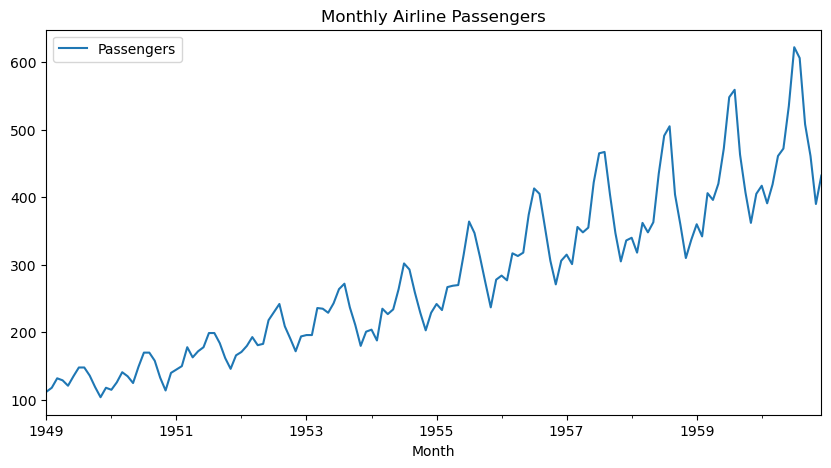

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

print(df.head())
df.plot(figsize=(10,5), title="Monthly Airline Passengers")
plt.show()

In [3]:
df.shape

(144, 1)

## Decomposition (Trend, Seasonality, Residuals)
We break the series into **trend, seasonality, and residuals** to understand its str

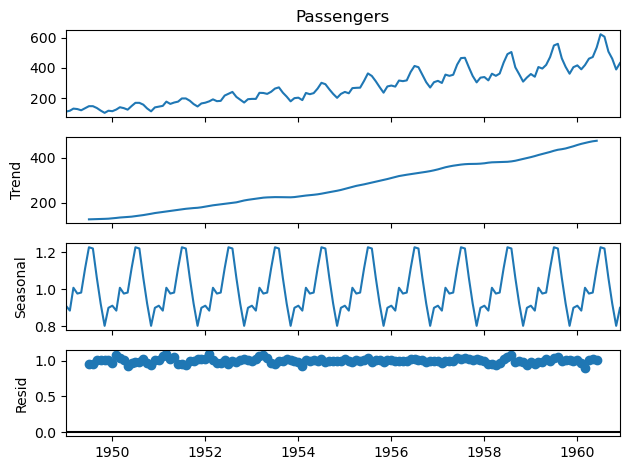

In [4]:
# Decompose time series
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')
decomposition.plot()
plt.show()

## Check Stationarity (ADF Test)
A stationary series is required for ARIMA models. 

We use the **Augmented Dickey-Fuller (ADF) test**.

In [5]:
# Augmented Dickey-Fuller Test
result = adfuller(df['Passengers'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] <= 0.05:
    print(" Data is stationary")
else:
    print(" Data is not stationary")


ADF Statistic: 0.8153688792060597
p-value: 0.9918802434376411
 Data is not stationary


## Make Series Stationary (Differencing)
If the series is not stationary, we use **differencing**.

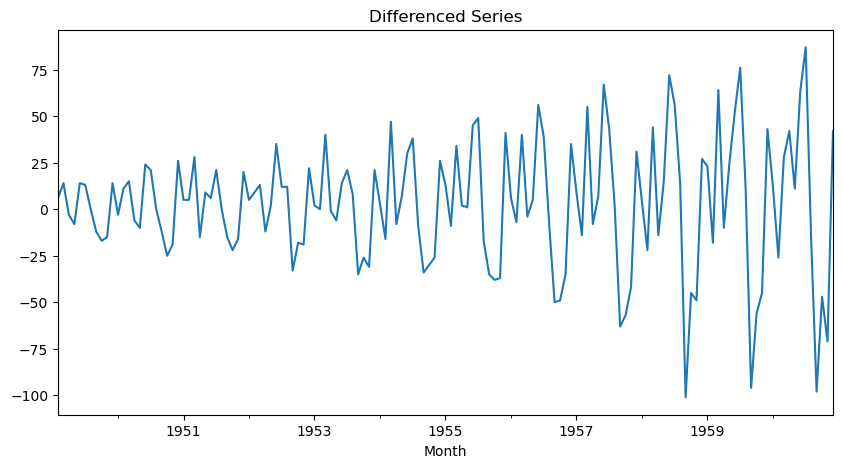

p-value after differencing: 0.0542132902838265


In [6]:
# First-order differencing
df_diff = df['Passengers'].diff().dropna()

df_diff.plot(figsize=(10,5), title="Differenced Series")
plt.show()

# Recheck stationarity
result = adfuller(df_diff)
print("p-value after differencing:", result[1])

## Build ARIMA Model

We fit an **ARIMA model (p,d,q)**. 

For now, we will use `(2,1,2)` as an example.

In [7]:
# Fit ARIMA model (p,d,q = 2,1,2 as an example)
model = ARIMA(df['Passengers'], order=(2,1,2))
model_fit = model.fit()

print(model_fit.summary())

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Wed, 17 Sep 2025   AIC                           1353.347
Time:                        15:53:49   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.853      0.0

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Forecasting
Now we forecast the next **24 months** and compare with actual values.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10324\1360405799.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df.index[-1], periods=25, freq='M')[1:], forecast, label="Forecast", color="red")


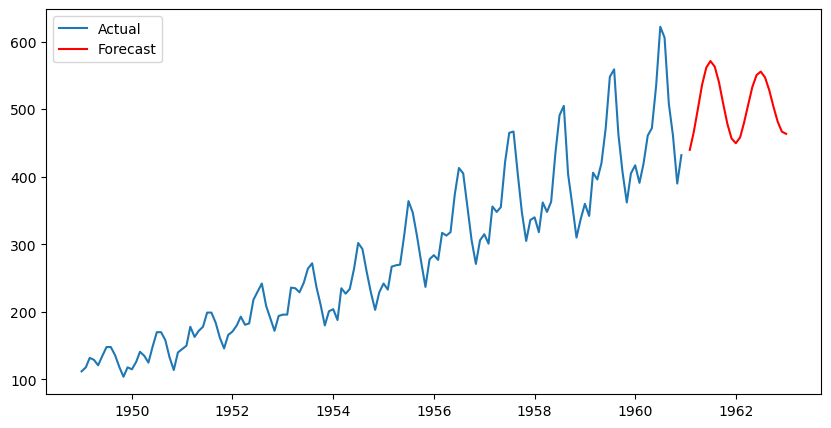

In [8]:
# Forecast next 24 months
forecast = model_fit.forecast(steps=24)

plt.figure(figsize=(10,5))
plt.plot(df.index, df['Passengers'], label="Actual")
plt.plot(pd.date_range(start=df.index[-1], periods=25, freq='M')[1:], forecast, label="Forecast", color="red")
plt.legend()
plt.show()

## Model Evaluation
We split data into **train (before last 12 months)** and **test (last 12 months)**,  
train the model, and calculate **RMSE**.

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE: 55.22283878325298


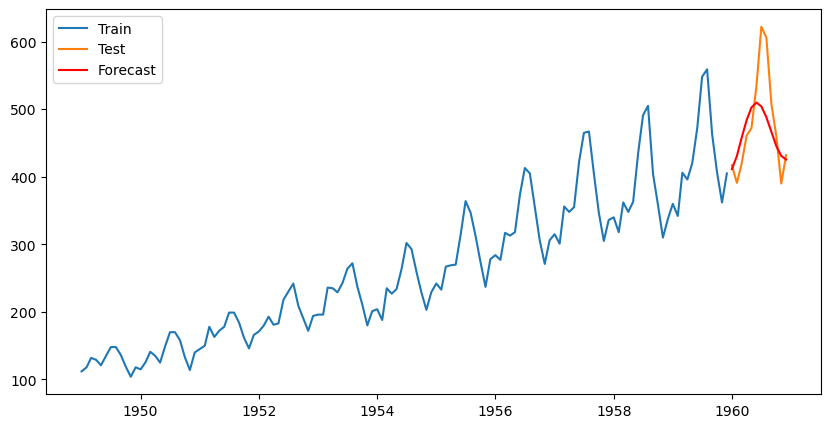

In [9]:
# Split into train and test
train = df.iloc[:-12]
test = df.iloc[-12:]

# Train ARIMA
model = ARIMA(train['Passengers'], order=(2,1,2))
model_fit = model.fit()

# Forecast on test set
forecast = model_fit.forecast(steps=12)

# RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

plt.figure(figsize=(10,5))
plt.plot(train.index, train['Passengers'], label="Train")
plt.plot(test.index, test['Passengers'], label="Test")
plt.plot(test.index, forecast, label="Forecast", color="red")
plt.legend()
plt.show()

#  Conclusion

In this notebook, we explored **Time Series Analysis** step by step:

-  Loaded and visualized the dataset  
-  Decomposed the series into **trend, seasonality, residuals**  
-  Checked and ensured **stationarity** using the ADF test  
-  Applied **ARIMA modeling** for forecasting  
-  Evaluated the model performance using **RMSE**  

# Key Takeaways:
- Stationarity is crucial for time series forecasting models.  
- ARIMA works well for data with trend + seasonality (after differencing).  
- Model performance can be further improved using **SARIMA, Prophet, or LSTM models** for complex datasets.  


# Time Series Project Flow — Cheat Sheet

##  Data Collection

- Gather time series data (e.g., stock prices, sales, weather).
- Ensure data has a proper **DateTime index** and consistent frequency.

##  Preprocessing
    
- Handle **missing values** (drop, forward-fill, backward-fill).
- **Resample** to desired frequency (daily, monthly, etc.).
- Apply **transformations** if needed:
  - Log transform → stabilize variance.
  - Differencing → remove trend / make stationary.

##  Decomposition

- Break series into:
  - **Trend**
  - **Seasonality**
  - **Residuals**
- Use **STL decomposition** for robust results.



##  Stationarity Check

- Plot rolling **mean & variance**.
- Run statistical tests:
  - **ADF test** (null = non-stationary).
  - **KPSS test** (null = stationary).


##  Modeling

- Start with **simple baselines**:
  - Naive forecast
  - Moving Average
  - Exponential Smoothing (Holt-Winters)
- Move to **advanced models**:
  - ARIMA / SARIMA / SARIMAX
  - Auto-ARIMA (auto select p,d,q)
  - Prophet (for complex seasonality)
  - ML/DL (LSTM, GRU, Transformers) for advanced use cases.



##  Evaluation

- Split into **train/test** (last few periods for test).
- Use metrics:
  - **MAE, RMSE, MAPE**
- Perform **time-series cross-validation** (rolling window).
- Check **residual diagnostics** (should look like white noise).


##  Forecast & Communicate

- Forecast future values with **confidence intervals**.
- Plot actual vs forecast.
- Explain trend, seasonality, and uncertainty to stakeholders.

> Quick Reminder:  
> **Data → Preprocessing → Decomposition → Stationarity → Modeling → Evaluation → Forecasting**
